<a href="https://colab.research.google.com/github/zahid214/ANN-backpropagation-python/blob/main/Dataset%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib

In [4]:
# neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
import seaborn as sns
import sklearn


In [ ]:
# code for data load, load a csv file 
data_to_load = files.upload()
df = pd.read_csv(io.BytesIO(data_to_load['dataset.csv']))

KeyboardInterrupt: 

In [ ]:
# data description
print("data type \n",df.dtypes)
print("data heads \n", df.head)
print("Size of data \n", df.size)
print("Shape of data \n", df.shape)
print("Data skew \n", df.skew())
print("Data correlation \n", df.corr(method='pearson'))
print("Data description \n", df.describe())

data type 
 UnitCost    float64
Sales       float64
Profit      float64
dtype: object
data heads 
 <bound method NDFrame.head of       UnitCost        Sales      Profit
0    21.854305   508.704707  486.850401
1    47.782144   470.099265  422.317121
2   189.698637  1018.352155  471.236350
3    31.939632   301.243109  269.303477
4    12.020839   478.032811  466.011972
..         ...          ...         ...
95   27.220802   418.418972  391.198170
96   28.522977   492.289829  463.766852
97   24.239346   534.115197  509.875852
98   30.719304  1055.338160  521.525219
99    9.855114   582.718325  572.863211

[100 rows x 3 columns]>
Size of data 
 300
Shape of data 
 (100, 3)
Data skew 
 UnitCost    3.500244
Sales       2.068912
Profit      0.242976
dtype: float64
Data correlation 
           UnitCost     Sales    Profit
UnitCost  1.000000  0.583894 -0.125098
Sales     0.583894  1.000000  0.536852
Profit   -0.125098  0.536852  1.000000
Data description 
          UnitCost        Sales      Pr

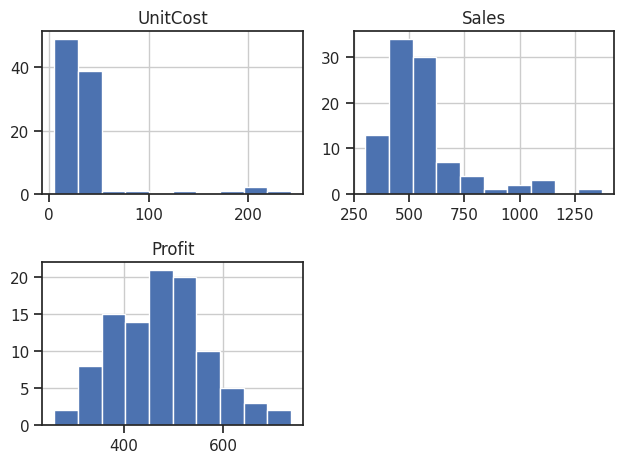

In [ ]:
# data display
#plot data histogram
df.hist(bins=10)
plt.tight_layout()
plt.show()

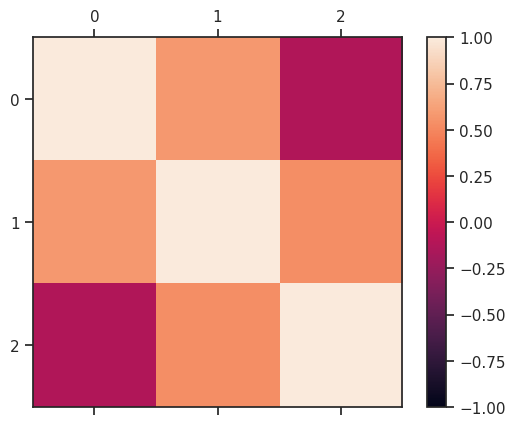

In [ ]:
#plot data correlation
correlations = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

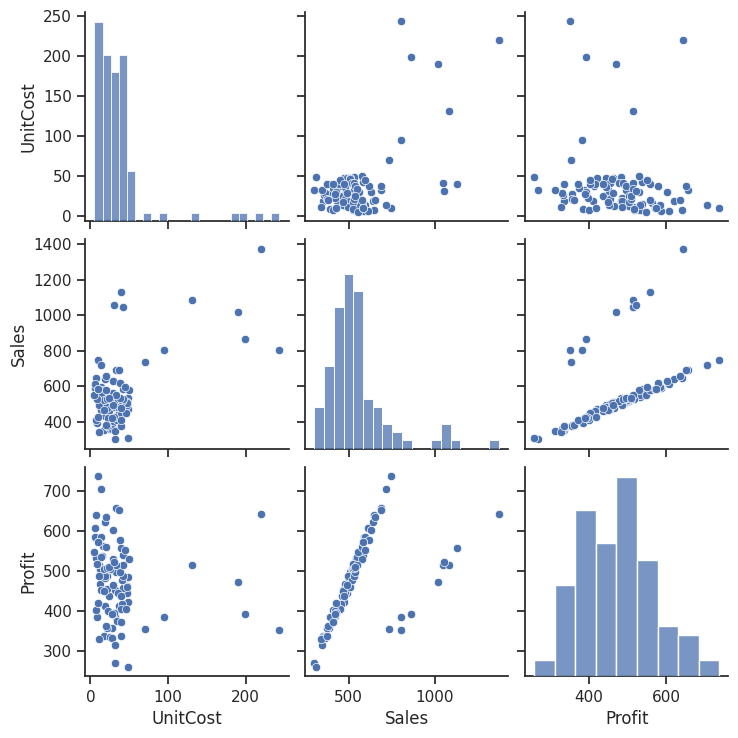

In [ ]:
#plot scatter matrix
#pd.plotting.scatter_matrix(df)
#plt.show()
#using seaborn
sns.set(style='ticks')
sns.pairplot(df)
plt.show()

In [ ]:
# identify missing values
df.isnull().values.any()

True

In [ ]:
# count missing values
print(df.isnull().sum())
print(df.isnull().sum().sum())

UnitCost    5
Sales       5
Profit      0
dtype: int64
10


In [ ]:
# fill missing value with zero or any other value with fillna() method
df.fillna(99)

,UnitCost,Sales,Profit
0,21.854305,508.704707,486.850401
1,47.782144,470.099265,422.317121
2,189.698637,1018.352155,471.236350
3,31.939632,301.243109,269.303477
4,12.020839,478.032811,466.011972
...,...,...,...
95,27.220802,418.418972,391.198170
96,28.522977,492.289829,463.766852
97,24.239346,534.115197,509.875852
98,30.719304,1055.338160,521.525219


In [ ]:
# fill missing with replace() method
df.replace(to_replace = np.nan, value = 33)

,UnitCost,Sales,Profit
0,21.854305,508.704707,486.850401
1,47.782144,470.099265,422.317121
2,189.698637,1018.352155,471.236350
3,31.939632,301.243109,269.303477
4,12.020839,478.032811,466.011972
...,...,...,...
95,27.220802,418.418972,391.198170
96,28.522977,492.289829,463.766852
97,24.239346,534.115197,509.875852
98,30.719304,1055.338160,521.525219


In [ ]:
# fill missing with interpolate() method
df.interpolate(method ='linear', limit_direction ='forward')

,UnitCost,Sales,Profit
0,21.854305,508.704707,486.850401
1,47.782144,470.099265,422.317121
2,189.698637,1018.352155,471.236350
3,31.939632,301.243109,269.303477
4,12.020839,478.032811,466.011972
...,...,...,...
95,27.220802,418.418972,391.198170
96,28.522977,492.289829,463.766852
97,24.239346,534.115197,509.875852
98,30.719304,1055.338160,521.525219


<Axes: >

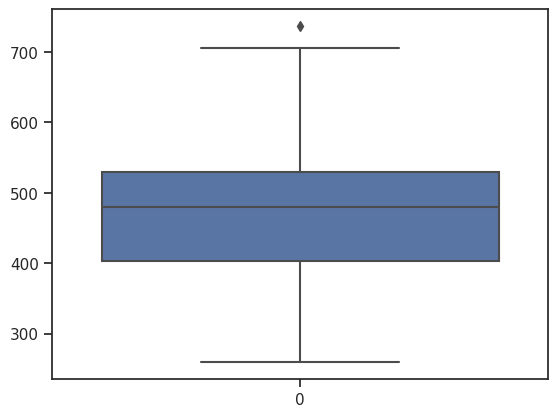

In [ ]:
#let see outlier in data
#sns.boxplot(df['UnitCost'])
#sns.boxplot(df['Sales'])
sns.boxplot(df['Profit'])

In [ ]:
# removing outliers from data
print("Old Shape: ", df.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['Sales']>=upper)[0]
lower_array = np.where(df['Sales']<=lower)[0]

# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

Old Shape:  (100, 3)
New Shape:  (83, 3)


In [ ]:
# remove outliers from data
print(df['UnitCost'].quantile(0.20))
print(df['UnitCost'].quantile(0.80))
df['UnitCost'] = np.where(df['UnitCost'] > 42, 36, df['UnitCost'])
print(df['Sales'].quantile(0.20))
print(df['Sales'].quantile(0.80))
df['Sales'] = np.where(df['Sales'] > 42, 36, df['Sales'])
print(df['Profit'].quantile(0.20))
print(df['Profit'].quantile(0.80))
df['Profit'] = np.where(df['Profit'] > 42, 36, df['Profit'])

13.238987059587524
36.0
424.0360410046761
614.5977367413498
391.54501261279216
540.6359593183296


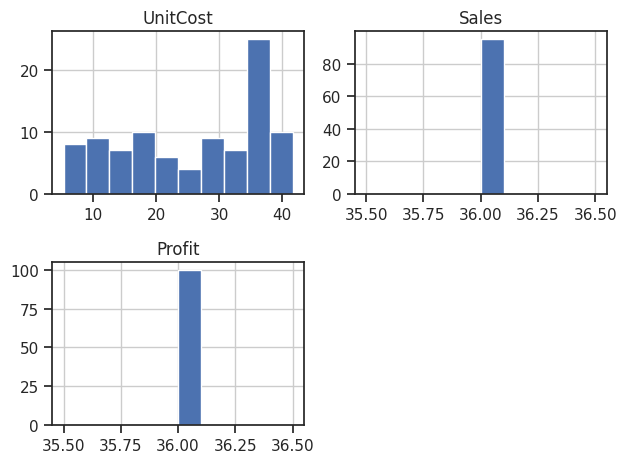

In [ ]:
# data display
#plot data histogram after data cleaning
df.hist(bins=10)
plt.tight_layout()
plt.show()

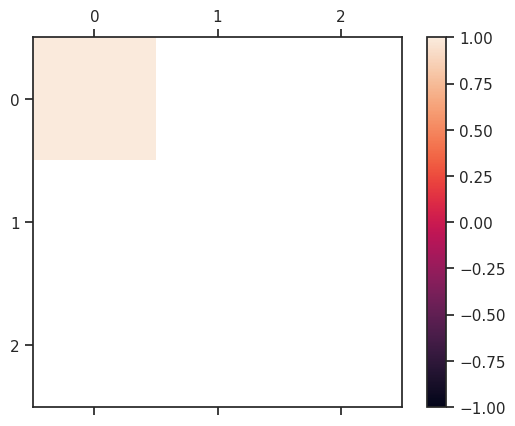

In [ ]:
#plot data correlation after data cleaning
correlations = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

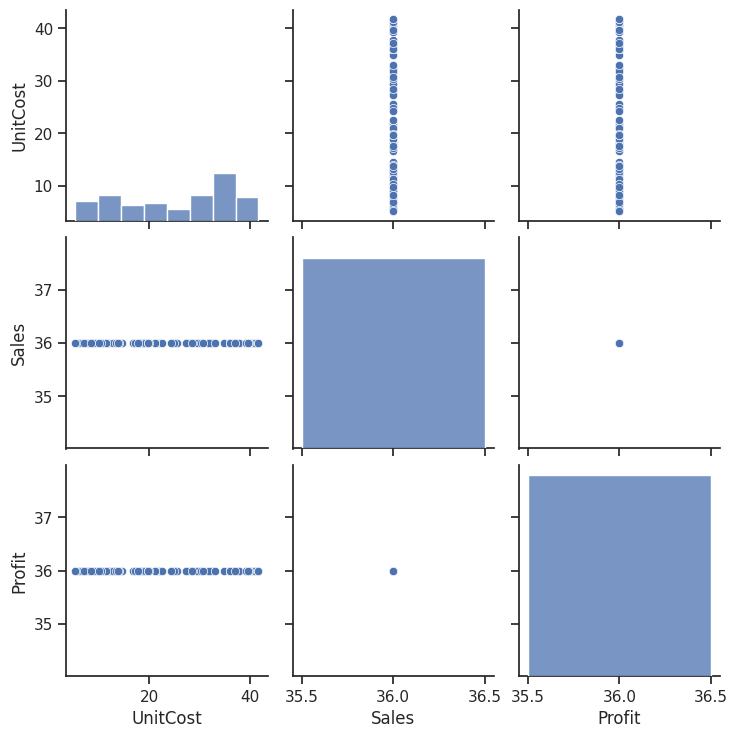

In [ ]:
#plot scatter matrix after data cleaning
#pd.plotting.scatter_matrix(df)
#plt.show()
#using seaborn
sns.set(style='ticks')
sns.pairplot(df)
plt.show()